In HU, the distance is given by
$d(z) = R_0 \frac{z}{(1+z)}$

the 4D radius is given by:
$R(z) = R_0 \frac{1}{(1+z)}$

where $R_0$ = 14.01 GLY
$G(t) = G_0\frac{R_0}{R(z)}$

$G = G_0 (1+z)$

Using Newtonian Dynamics while reversing time (having the average galaxy moving back in time and through the 4D spatial manifold), we get:
$G(z)\frac{M}{r(z)^2} = \frac{v(z)^2}{r(z)}$

r(z)=$G(z)\frac{M}{v(z)^2}=G_0 (1+z)\frac{M}{v(z)^2}$

Since the angular size of a galaxy is roughly r(z)/d(z)

AngularSize= $G_0 (1+z)\frac{M}{v(z)^2}/(R_0\frac{z}{(1+z)})= \frac{G_0M(1+z)^2}{R_0  z v(z)^2} \propto \frac{1}{z}$

This means that v(z) =$ v_0(1+z)$ which implies that $r(z) = r_0/(1+z)$

where $R_0$ is the current 4D radius (14.01 GLY), and $v_0$ is the current tangential velocity of a body in orbit.

So, as G varies, the radius of the orbits varies, and velocity adjusts to keep angular momentum constant. The resulting angular size z-dependency is $\frac{1}{z} $as depicted in Kapahi’s data.

**NOTICE THAT THIS IS NOT A SMALL RESULT. I DERIVED THE Z-DEPENDENCY OF THE ANGULAR SIZE (AN OBSERVABLE) IN AN EPOCH-DEPENDENT G. THIS HAS NEVER BEEN DONE, AND IT SUPPORTS MY THEORY AND DEBUNKS GENERAL RELATIVITY.**

**JWST'S OBSERVATION OF HUGE GALAXIES IS THE RESULT OF INCORRECT GALAXY SIZE PREDICTIONS AND DISTRIBUTION DUE TO RIEMMANIAN GEOMETRY: NO IFS OR BUTS.**


In [1]:
import matplotlib
# matplotlib.use('TkAgg')  # Use the TkAgg backend (or another appropriate one)
import matplotlib.pyplot as plt
import numpy as np
import math
import xarray as xr
import pandas as pd
from hugalaxy import GalaxyWrapper, plotRotationCurve, calculate_density_parameters, move_rotation_curve
from timeit import default_timer as timer
import jupyter_to_medium as medium


import ipywidgets as widgets
from timeit import default_timer as timer
from IPython.display import display, HTML
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # This import registers the 3D projection
from matplotlib.animation import FuncAnimation
import astropy.constants as cc
M_sun = cc.M_sun
M_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Solar mass' value=1.988409870698051e+30 uncertainty=4.468805426856864e+25 unit='kg' reference='IAU 2015 Resolution B 3 + CODATA 2018'>

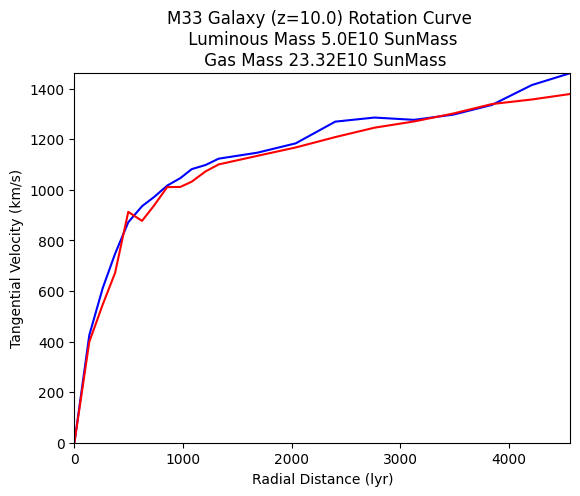

In [2]:
####################################################
# MODELING M33 GALAXY
####################################################

m33_rotational_curve = np.array( [
    [0.0, 0.0],
    [1508.7187, 38.674137],
    [2873.3889, 55.65067],
    [4116.755, 67.91063],
    [5451.099, 79.22689],
    [6846.0957, 85.01734],
    [8089.462, 88.38242],
    [9393.48, 92.42116],
    [10727.824, 95.11208],
    [11880.212, 98.342697],
    [13275.208, 99.82048],
    [14609.553, 102.10709],
    [18521.607, 104.25024],
    [22403.336, 107.60643],
    [26406.369, 115.40966],
    [30379.076, 116.87875],
    [34382.107, 116.05664],
    [38354.813, 117.93005],
    [42266.87, 121.42091],
    [46300.227, 128.55017],
    [50212.285, 132.84966]
])

M33_Distance = 3.2E6
Radius_Universe_4D = 14.03E9
redshift0 = M33_Distance / (Radius_Universe_4D - M33_Distance)
redshift = 10
nr = 160
# NZ should always be ODD
nz = 101
ntheta = 180
R_max = 50000.0

rho_0, alpha_0, rho_1, alpha_1, h0 = calculate_density_parameters(redshift)
GalaxyMass = 5E10
# Create The Galaxy
M33 = GalaxyWrapper(GalaxyMass, rho_0, alpha_0, rho_1, alpha_1, h0, R_max, nr,
                    nz, ntheta, redshift,GPU_ID=0, cuda=True, taskflow=True)
new_m33_rotational_curve = move_rotation_curve(m33_rotational_curve, redshift0, redshift)
M33.read_galaxy_rotation_curve(new_m33_rotational_curve)
M33.rho = M33.density_wrapper_internal()
M33.v_simulated_points = M33.calculate_rotation_velocity_internal()
# M33.simulate_rotation_curve()
plotRotationCurve(M33)

In [3]:
time_step_years = 200E6
eta = 1E-4
temperature =7
current_time = 14E9/(1+M33.redshift)
n_epochs = 50
epochs = current_time + np.arange(n_epochs)*time_step_years
redshifts = pd.DataFrame(14.1E9/epochs -1)
filename_base = "./data/"
M33.DrudeGalaxyFormation(epochs,eta, temperature,filename_base)

There are no NaNs in the array.
There are no NaNs in the current_masses array at epoch 1.
There are no NaNs in the array.
There are no NaNs in the current_masses array at epoch 2.
There are no NaNs in the array.
There are no NaNs in the current_masses array at epoch 3.
There are no NaNs in the array.
There are no NaNs in the current_masses array at epoch 4.
There are no NaNs in the array.
There are no NaNs in the current_masses array at epoch 5.
There are no NaNs in the array.
There are no NaNs in the current_masses array at epoch 6.
There are no NaNs in the array.
There are no NaNs in the current_masses array at epoch 7.
There are no NaNs in the array.
There are no NaNs in the current_masses array at epoch 8.
There are no NaNs in the array.
There are no NaNs in the current_masses array at epoch 9.
There are no NaNs in the array.
There are no NaNs in the current_masses array at epoch 10.
There are no NaNs in the array.
There are no NaNs in the current_masses array at epoch 11.
There ar

In [9]:
a = xr.DataArray(np.load("./data/_all_current_masses.npy"))

In [10]:
a

<xarray.DataArray (dim_0: 50, dim_1: 160, dim_2: 101)>
array([[[2.44379224e+14, 2.44379224e+14, 2.44379224e+14, ...,
         2.44379224e+14, 2.44379224e+14, 2.44379224e+14],
        [2.15498097e+14, 2.15498097e+14, 2.15498097e+14, ...,
         2.15498097e+14, 2.15498097e+14, 2.15498097e+14],
        [4.05528284e+14, 4.05528284e+14, 4.05528284e+14, ...,
         4.05528284e+14, 4.05528284e+14, 4.05528284e+14],
        ...,
        [4.24379115e+34, 4.24379115e+34, 4.24379115e+34, ...,
         4.24379115e+34, 4.24379115e+34, 4.24379115e+34],
        [4.06989537e+34, 4.06989537e+34, 4.06989537e+34, ...,
         4.06989537e+34, 4.06989537e+34, 4.06989537e+34],
        [3.89481859e+34, 3.89481859e+34, 3.89481859e+34, ...,
         3.89481859e+34, 3.89481859e+34, 3.89481859e+34]],

       [[1.85320154e+14, 1.85320154e+14, 1.85320154e+14, ...,
         1.85320154e+14, 1.85320154e+14, 1.85320154e+14],
        [1.64355467e+14, 1.64355467e+14, 1.64355467e+14, ...,
         1.64355467e+14, 1.64355467e+14, 1.64355467e+14],
        [3.10117915e+14, 3.10117915e+14, 3.10117915e+14, ...,
         3.10117915e+14, 3.10117915e+14, 3.10117915e+14],
...
        [5.50544792e+34, 5.50544792e+34, 5.50544792e+34, ...,
         5.50544792e+34, 5.50544792e+34, 5.50544792e+34],
        [5.23095165e+34, 5.23095165e+34, 5.23095165e+34, ...,
         5.23095165e+34, 5.23095165e+34, 5.23095165e+34],
        [4.95346070e+34, 4.95346070e+34, 4.95346070e+34, ...,
         4.95346070e+34, 4.95346070e+34, 4.95346070e+34]],

       [[4.07099495e+12, 4.07099495e+12, 4.07099495e+12, ...,
         4.07099495e+12, 4.07099495e+12, 4.07099495e+12],
        [3.90060910e+12, 3.90060910e+12, 3.90060910e+12, ...,
         3.90060910e+12, 3.90060910e+12, 3.90060910e+12],
        [7.63796362e+12, 7.63796362e+12, 7.63796362e+12, ...,
         7.63796362e+12, 7.63796362e+12, 7.63796362e+12],
        ...,
        [5.51640702e+34, 5.51640702e+34, 5.51640702e+34, ...,
         5.51640702e+34, 5.51640702e+34, 5.51640702e+34],
        [5.24096565e+34, 5.24096565e+34, 5.24096565e+34, ...,
         5.24096565e+34, 5.24096565e+34, 5.24096565e+34],
        [4.96250846e+34, 4.96250846e+34, 4.96250846e+34, ...,
         4.96250846e+34, 4.96250846e+34, 4.96250846e+34]]])
Dimensions without coordinates: dim_0, dim_1, dim_2

In [ ]:
current_masses = {}
current_r = {}
current_z = {}
current_dv0 = {}

output = M33.DrudePropagator(redshifts, time_step_years, eta, temperature)
for i, out in enumerate(output): 
    numpy_array_masses, numpy_array_r, numpy_array_dv0, numpy_array_z = out
    current_masses[i] = numpy_array_masses
    current_r[i] = numpy_array_r
    current_z[i] = numpy_array_z
    current_dv0[i] = numpy_array_dv0
    print("Done redshift ={}".format(redshifts[0][i]), flush=True)


In [ ]:
    
# Create a list to store DataArray objects
data_arrays = []

# Iterate over the dictionary to create a DataArray for each DataFrame
for key, df in current_masses.items():
    data_array = xr.DataArray(df)
    data_arrays.append(data_array)

# Combine all the DataArrays into one
pd_masses = xr.concat(data_arrays, dim='redshift')
pd_r = pd.DataFrame.from_dict(current_r)
pd_z = pd.DataFrame.from_dict(current_z)
pd_dv0 = pd.DataFrame.from_dict(current_dv0)
pd_masses.to_netcdf("./data/pd_masses.nc")
pd_r.to_pickle("./data/pd_r.pkl")
pd_z.to_pickle("./data/pd_z.pkl")
pd_dv0.to_pickle("./data/pd_dv0.pkl")
redshifts.to_pickle("./data/redshifts.pkl")

In [ ]:
import math
import numpy as np
import pandas as pd
import xarray as xr
import ipywidgets as widgets
from timeit import default_timer as timer
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # This import registers the 3D projection
from matplotlib.animation import FuncAnimation
pd_masses = xr.open_dataarray('./data/pd_masses.nc').rename({'dim_0': 'radius', 'dim_1': 'elevation'})
pd_r = pd.read_pickle("./data/pd_r.pkl")
pd_z = pd.read_pickle("./data/pd_z.pkl")
pd_dv0 = pd.read_pickle("./data/pd_dv0.pkl")
redshifts = pd.read_pickle("./data/redshifts.pkl")

def plot_2d_mass(z):
    fig = plt.figure(figsize=(10, 8))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    
    R_0 = 14.01  # 4D radius of the Universe
    z_0 = redshifts[0][z]  # the initial redshift
    
    # Create the 2D subplot
    ax = plt.subplot(gs[0])
    
    # Create a symmetric X grid by concatenating the negative and positive r values
    r_extended = np.concatenate((-pd_r[z][::-1], pd_r[z]))
    dv0 = pd_dv0[z].values[:, None]  # reshapes from (120,) to (120,1)

    
    Y, X = np.meshgrid(pd_z[z]/1000, r_extended)  # Use pd_z for the vertical axis
    Z = np.concatenate((np.flip(pd_masses[z].values/dv0, axis=0), pd_masses[z].values/dv0), axis=0)

    contour = ax.contourf(X, Y, Z, cmap=cm.coolwarm)
    ax.set_title("$M_{33}$ Luminous Density Profile\n Redshift z = %.2f" % z_0)
    ax.set_xlabel('X (1000 Lyr)')
    ax.set_ylabel('Z (1000 Lyr)')  # Change Y label to Z
    ax.pcolormesh(X/1000, Y, Z, cmap=cm.coolwarm)

    # Create the second subplot
    ax = plt.subplot(gs[1], projection='polar')  # 1 row, 2 columns, second subplot
    circle_outer = plt.Circle((0, 0), R_0, transform=ax.transData._b, fill = False)
    circle_inner = plt.Circle((0, 0), R_0/(1+z_0), transform=ax.transData._b, fill = False, linestyle='dashed')
    ax.add_artist(circle_outer)
    ax.add_artist(circle_inner)

    z_values = np.linspace(0, z_0, 100)
    R_values = R_0/(1+z_values)
    R_z0 =  R_0/(1+z_0)
    angle_0 = 1 - 1/(1+z_0)
    angle_values =  R_values/R_0
    ax.plot(np.pi/2-angle_0, R_z0, 'ro')
    ax.text(np.pi/2, R_0, 'Earth', horizontalalignment='right')
    ax.text((np.pi/2-angle_0)*0.92, R_z0, '$M_{33}$', horizontalalignment='left')
    ax.scatter(np.pi/2 - angle_0 + (R_values-R_z0)/R_0, R_values, color='b', s=0.5)
    ax.set_rmax(R_0)
    ax.set_rticks([])  # Less radial ticks
    ax.set_rlabel_position(-24.5)  # Move radial labels away from plotted line
    ax.grid(True)

    ax.set_title("$M_{33}$ Ancient Photon's path across \nthe Hyperspherical Universe", va='bottom')
    plt.subplots_adjust(wspace=0.3)
    plt.show()

z_slider = widgets.IntSlider(min=0, max=49, step=1, value=0, description='Redshift:', continuous_update=False)
interactive_plot = widgets.interactive_output(plot_2d_mass, {'z': z_slider})
display(z_slider, interactive_plot)


In [ ]:
z=40

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

R_0 = 14.01  # 4D radius of the Universe
z_0 = redshifts[0][z]  # the initial redshift

# Create the 2D subplot
ax = plt.subplot(gs[0])

# Create a symmetric X grid by concatenating the negative and positive r values
r_extended = np.concatenate((-pd_r[z][::-1], pd_r[z]))
dv0 = pd_dv0[z].values[:, None]  # reshapes from (120,) to (120,1)


Y, X = np.meshgrid(pd_z[z]/1000, r_extended)  # Use pd_z for the vertical axis
Z = np.concatenate((np.flip(pd_masses[z].values, axis=0), pd_masses[z].values), axis=0)

contour = ax.contourf(X, Y, Z, cmap=cm.coolwarm)
ax.set_title("$M_{33}$ Luminous Density Profile\n Redshift z = %.2f" % z_0)
ax.set_xlabel('X (1000 Lyr)')
ax.set_ylabel('Z (1000 Lyr)')  # Change Y label to Z
ax.pcolormesh(X/1000, Y, Z, cmap=cm.coolwarm)

# Create the second subplot
ax = plt.subplot(gs[1], projection='polar')  # 1 row, 2 columns, second subplot
circle_outer = plt.Circle((0, 0), R_0, transform=ax.transData._b, fill = False)
circle_inner = plt.Circle((0, 0), R_0/(1+z_0), transform=ax.transData._b, fill = False, linestyle='dashed')
ax.add_artist(circle_outer)
ax.add_artist(circle_inner)

z_values = np.linspace(0, z_0, 100)
R_values = R_0/(1+z_values)
R_z0 =  R_0/(1+z_0)
angle_0 = 1 - 1/(1+z_0)
angle_values =  R_values/R_0
ax.plot(np.pi/2-angle_0, R_z0, 'ro')
ax.text(np.pi/2, R_0, 'Earth', horizontalalignment='right')
ax.text((np.pi/2-angle_0)*0.92, R_z0, '$M_{33}$', horizontalalignment='left')
ax.scatter(np.pi/2 - angle_0 + (R_values-R_z0)/R_0, R_values, color='b', s=0.5)
ax.set_rmax(R_0)
ax.set_rticks([])  # Less radial ticks
ax.set_rlabel_position(-24.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("$M_{33}$ Ancient Photon's path across \nthe Hyperspherical Universe", va='bottom')
plt.subplots_adjust(wspace=0.3)
plt.show()


In [ ]:
radius_index =50
for elevation_index in pd_masses.elevation:
    masses_at_elevation_and_radius = pd_masses[:, radius_index, elevation_index]
    plt.plot(pd_masses.redshift, masses_at_elevation_and_radius, label=f'Elevation {elevation_index}')

plt.xlabel('Redshift')
plt.ylabel('Mass')
# plt.legend()
plt.show()


In [ ]:
ZZ = xr.DataArray(Z, coords=da.coords, dims=da.dims, attrs=da.attrs)

In [ ]:
import math
import numpy as np
import pandas as pd
import xarray as xr
import ipywidgets as widgets
from timeit import default_timer as timer
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  # This import registers the 3D projection
from matplotlib.animation import FuncAnimation
pd_masses = xr.open_dataarray('./data/pd_masses.nc').rename({'dim_0': 'radius', 'dim_1': 'elevation'})
pd_r = pd.read_pickle("./data/pd_r.pkl")
pd_z = pd.read_pickle("./data/pd_z.pkl")
pd_dv0 = pd.read_pickle("./data/pd_dv0.pkl")
redshifts = pd.read_pickle("./data/redshifts.pkl")

def plot_2d_mass(z):
    fig = plt.figure(figsize=(10, 8))
    gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])
    
    R_0 = 14.01  # 4D radius of the Universe
    z_0 = redshifts[0][z]  # the initial redshift
    
    # Create the 2D subplot
    ax = plt.subplot(gs[0])
    
    # Create a symmetric X grid by concatenating the negative and positive r values
    r_extended = np.concatenate((-pd_r[z][::-1], pd_r[z]))
    dv0 = pd_dv0[z].values[:, None]  # reshapes from (120,) to (120,1)

    
    Y, X = np.meshgrid(pd_z[z]/1000, r_extended)  # Use pd_z for the vertical axis
    Z = np.concatenate((np.flip(pd_masses[z].values, axis=0), pd_masses[z].values), axis=0)

    contour = ax.contourf(X, Y, Z, cmap=cm.coolwarm)
    ax.set_title("$M_{33}$ Luminous Density Profile\n Redshift z = %.2f" % z_0)
    ax.set_xlabel('X (1000 Lyr)')
    ax.set_ylabel('Z (1000 Lyr)')  # Change Y label to Z
    ax.pcolormesh(X/1000, Y, Z, cmap=cm.coolwarm)

    # Create the second subplot
    ax = plt.subplot(gs[1], projection='polar')  # 1 row, 2 columns, second subplot
    circle_outer = plt.Circle((0, 0), R_0, transform=ax.transData._b, fill = False)
    circle_inner = plt.Circle((0, 0), R_0/(1+z_0), transform=ax.transData._b, fill = False, linestyle='dashed')
    ax.add_artist(circle_outer)
    ax.add_artist(circle_inner)

    z_values = np.linspace(0, z_0, 100)
    R_values = R_0/(1+z_values)
    R_z0 =  R_0/(1+z_0)
    angle_0 = 1 - 1/(1+z_0)
    angle_values =  R_values/R_0
    ax.plot(np.pi/2-angle_0, R_z0, 'ro')
    ax.text(np.pi/2, R_0, 'Earth', horizontalalignment='right')
    ax.text((np.pi/2-angle_0)*0.92, R_z0, '$M_{33}$', horizontalalignment='left')
    ax.scatter(np.pi/2 - angle_0 + (R_values-R_z0)/R_0, R_values, color='b', s=0.5)
    ax.set_rmax(R_0)
    ax.set_rticks([])  # Less radial ticks
    ax.set_rlabel_position(-24.5)  # Move radial labels away from plotted line
    ax.grid(True)

    ax.set_title("$M_{33}$ Ancient Photon's path across \nthe Hyperspherical Universe", va='bottom')
    plt.subplots_adjust(wspace=0.3)
    plt.show()

z_slider = widgets.IntSlider(min=0, max=49, step=1, value=0, description='Redshift:', continuous_update=False)
interactive_plot = widgets.interactive_output(plot_2d_mass, {'z': z_slider})
display(z_slider, interactive_plot)


In [ ]:
pd_z[0:3]